<a href="https://colab.research.google.com/github/Narichie/-Large-Language-Model/blob/main/Richard_Neural_N_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESIGNING AND TRAINING A NEURAL NETWORK FOR SUPPORTING DECISIONS: BANK CUSTOMER CHURN PREDICTION.

# GOAL: Given a banking customer, build a neural network-based classifier to determine whether the customer will leave within the next 6 months.

----------------------
## **Objective**
----------------------

Building a classification model using neural networks to predict bank customer churn.




## **DATA DESCRIPTION**
---------------------------
The study dataset contains 10,000 samples with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, and others.

**Data Dictionary**:
----------------------------
* CustomerId: Unique ID assigned to each customer
* Surname: Customer’s last name
* CreditScore: Defines the customer’s credit history
* Geography: Customer’s location
* Gender: Defines the customer’s gender
* Age**: Customer’s age
* Tenure: Number of years the customer has been with the bank
* NumOfProducts: Refers to the number of products a customer has purchased through the bank
* Balance: Account balance
* HasCrCard: Categorical variable indicating whether the customer has a credit card or not
* EstimatedSalary: Estimated salary
* isActiveMember: Categorical variable indicating whether the customer is an active member of the bank (active in terms of regularly using banking products, making transactions, etc.)
* Exited: Categorical variable indicating whether the customer left the bank within six months or not. Possible values: 0 = No (The customer did not leave the bank) and 1 = Yes (The customer left the bank)

## Loading the libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# importing the dataset
data = pd.read_csv('Bank_Clents.csv')

# Check the top five records of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 **Observation**

 * The dataset contains 10,000 entries with 14 columns. Here are a few key insights
 * The Target variable is Exited, which indicates whether a customer left the bank within six months, with values 0 (stayed) or 1 (left)
 * All columns show complete data without missing entries.

 **Features**
 * Categorical Variables - Geography, Gender, and HasCrCard, IsActiveMember
 * Numerical Variables - Continuous: CreditScore, Age, Balance, EstimatedSalary.
Discrete: Tenure, NumOfProducts
   

I will remove RowNumber, CustomerId, and Surname; these columns seem unnecessary for churn prediction.

In [ ]:
# Dropping columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Data Preprocessing

In [ ]:
#One-Hot Encode categorical features (Geography and Gender)

data = pd.get_dummies(data, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], drop_first=True)

#### Splitting the data

Now, I will divide the dataset into training and test sets. I will extract and store all the independent variables in a **feature** variable to do this. The **target** variable **Exited** will be stored in a variable called target. These two variables will divide the main dataset into training and test sets.

In [ ]:
# create the set in independent and dependent variable
features = data.drop(['Exited'], axis=1)

target = data['Exited']

In [ ]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
9254,686,32,6,0.00,2,179093.26,0,0,1,1,1
1561,632,42,4,119624.60,2,195978.86,1,0,1,1,1
1670,559,24,3,114739.92,1,85891.02,0,1,1,1,0
6087,561,27,9,135637.00,1,153080.40,0,0,0,1,0
6669,517,56,9,142147.32,1,39488.04,0,0,1,0,0


In [ ]:
y_train.head()

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

Scaling of Numerical Variables

In [ ]:
# Applying scaler to numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features =['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
9254,0.672,0.189189,0.6,0.000000,0.333333,0.895550,0,0,1,1,1
1561,0.564,0.324324,0.4,0.476786,0.333333,0.980029,1,0,1,1,1
1670,0.418,0.081081,0.3,0.457317,0.000000,0.429261,0,1,1,1,0
6087,0.422,0.121622,0.9,0.540606,0.000000,0.765408,0,0,0,1,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0.197107,0,0,1,0,0


## Model Building

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

This architecture model has two hidden layers, the first with 16 neurons and the second with 32, with ReLU activation function.

In [ ]:
#Adding the layers sequentially
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of parameters to estimate is 769—total training time: 6.56 seconds.

In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import time
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

start_time = time.time()

history = model.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
225/225 - 0s - loss: 0.5182 - accuracy: 0.7918 - val_loss: 0.4641 - val_accuracy: 0.8037 - 399ms/epoch - 2ms/step
Epoch 2/100
225/225 - 0s - loss: 0.4787 - accuracy: 0.7935 - val_loss: 0.4426 - val_accuracy: 0.8037 - 82ms/epoch - 364us/step
Epoch 3/100
225/225 - 0s - loss: 0.4654 - accuracy: 0.7949 - val_loss: 0.4317 - val_accuracy: 0.8050 - 82ms/epoch - 365us/step
Epoch 4/100
225/225 - 0s - loss: 0.4534 - accuracy: 0.8029 - val_loss: 0.4173 - val_accuracy: 0.8163 - 86ms/epoch - 380us/step
Epoch 5/100
225/225 - 0s - loss: 0.4410 - accuracy: 0.8081 - val_loss: 0.4053 - val_accuracy: 0.8363 - 82ms/epoch - 363us/step
Epoch 6/100
225/225 - 0s - loss: 0.4299 - accuracy: 0.8146 - val_loss: 0.3999 - val_accuracy: 0.8350 - 82ms/epoch - 363us/step
Epoch 7/100
225/225 - 0s - loss: 0.4203 - accuracy: 0.8201 - val_loss: 0.3914 - val_accuracy: 0.8400 - 84ms/epoch - 371us/step
Epoch 8/100
225/225 - 0s - loss: 0.4117 - accuracy: 0.8263 - val_loss: 0.3846 - val_accuracy: 0.8363 - 81ms/epoc

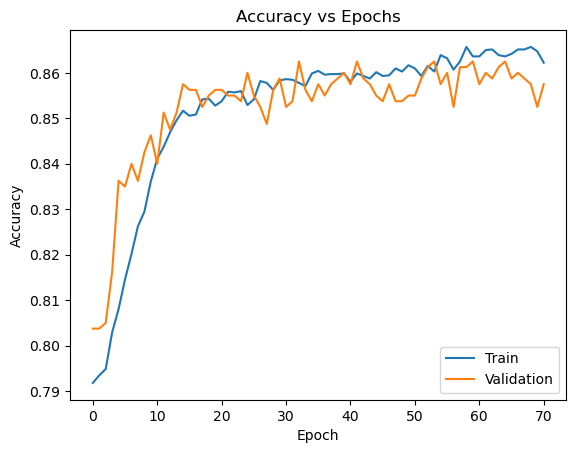

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Now let's calculate Accuracy for Test (X and y)
model.evaluate(X_test,(y_test))

63/63 [==============================] - 0s 369us/step - loss: 0.3405 - accuracy: 0.8635


[0.3404654562473297, 0.8634999990463257]

In [ ]:
# Predicting Test
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=0)
normal_y_test = np.argmax(y_test, axis=0)

63/63 [==============================] - 0s 563us/step


A graphical representation of this neural network (Model)

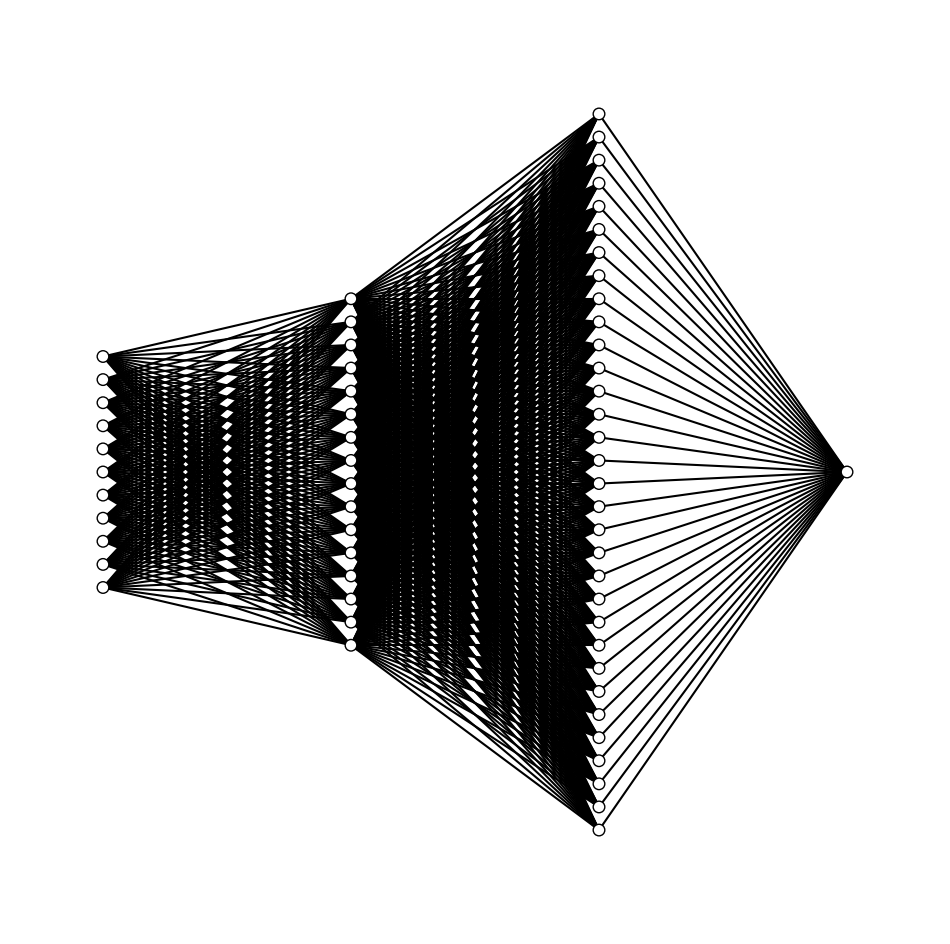

In [ ]:
# Drawing the architecture


def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of your model
layer_sizes = [11, 16, 32, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose = 1)
model_test_pred = np.round(model.predict(X_test))

63/63 [==============================] - 0s 749us/step


Results for model TEST
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



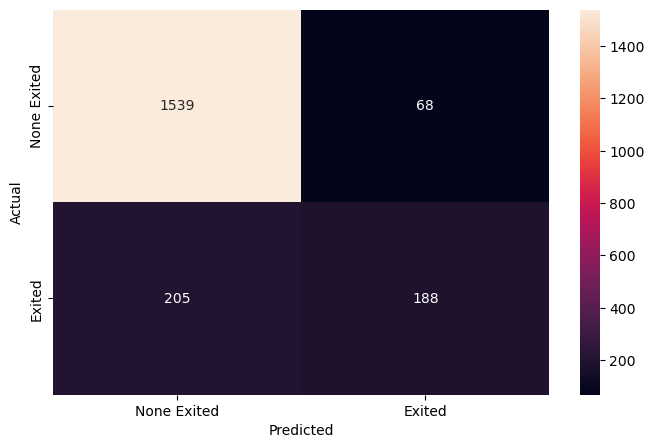

In [ ]:
print('======================================================================================================================')
print('Results for model TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_test_pred))
cm = confusion_matrix(y_test, model_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['None Exited', 'Exited'], yticklabels=['None Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**First Model**
This architectural model features two hidden layers: the first layer consists of 16 neurons, while the second layer has 32 neurons, both utilizing the ReLU activation function.

I utilized the Adam optimizer with a learning rate set at 0.001. The training process spanned 100 epochs, incorporating a 10% validation split and a batch size of 32. The model attained an accuracy of 86% on the test dataset, yielding a loss of 0.3405. In total, 769 parameters were estimated, and the training was completed in 6.56 seconds.

# Improved Neural Network model (Model_2)

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

With the modify_1 model, I will develop an architecture of seven hidden layers: the first with 16, the second with 32, the third with 16, the fourth with 64, the fifth with 256, the sixth with 64, and the seventh with 16, all using ReLU activation functions.

In [ ]:
#Adding the layers sequentially
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(11,)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 16)                1

In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import time
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

start_time = time.time()

history_1 = model_1.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
225/225 - 1s - loss: 0.5069 - accuracy: 0.7887 - val_loss: 0.4324 - val_accuracy: 0.8037 - 625ms/epoch - 3ms/step
Epoch 2/100
225/225 - 0s - loss: 0.4572 - accuracy: 0.7992 - val_loss: 0.4120 - val_accuracy: 0.8175 - 165ms/epoch - 733us/step
Epoch 3/100
225/225 - 0s - loss: 0.4371 - accuracy: 0.8139 - val_loss: 0.4108 - val_accuracy: 0.8325 - 163ms/epoch - 722us/step
Epoch 4/100
225/225 - 0s - loss: 0.4202 - accuracy: 0.8204 - val_loss: 0.3856 - val_accuracy: 0.8425 - 175ms/epoch - 779us/step
Epoch 5/100
225/225 - 0s - loss: 0.3960 - accuracy: 0.8361 - val_loss: 0.3628 - val_accuracy: 0.8512 - 206ms/epoch - 917us/step
Epoch 6/100
225/225 - 0s - loss: 0.3691 - accuracy: 0.8472 - val_loss: 0.3555 - val_accuracy: 0.8525 - 163ms/epoch - 723us/step
Epoch 7/100
225/225 - 0s - loss: 0.3595 - accuracy: 0.8547 - val_loss: 0.3511 - val_accuracy: 0.8537 - 161ms/epoch - 715us/step
Epoch 8/100
225/225 - 0s - loss: 0.3508 - accuracy: 0.8565 - val_loss: 0.3538 - val_accuracy: 0.8550 - 164

The number of parameters to estimate is 36497—total training time: 5.53 seconds.

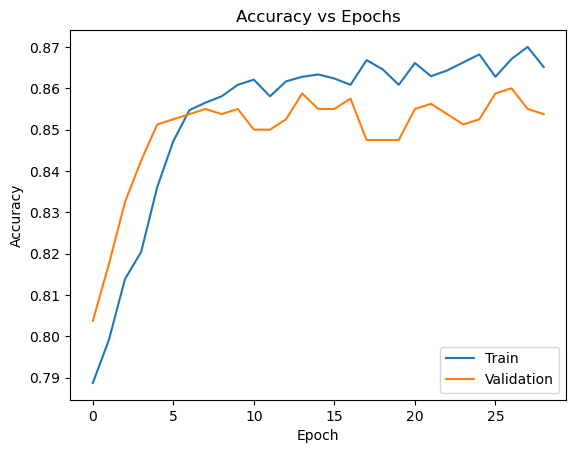

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

A graphical representation of this neural network (Model_1)

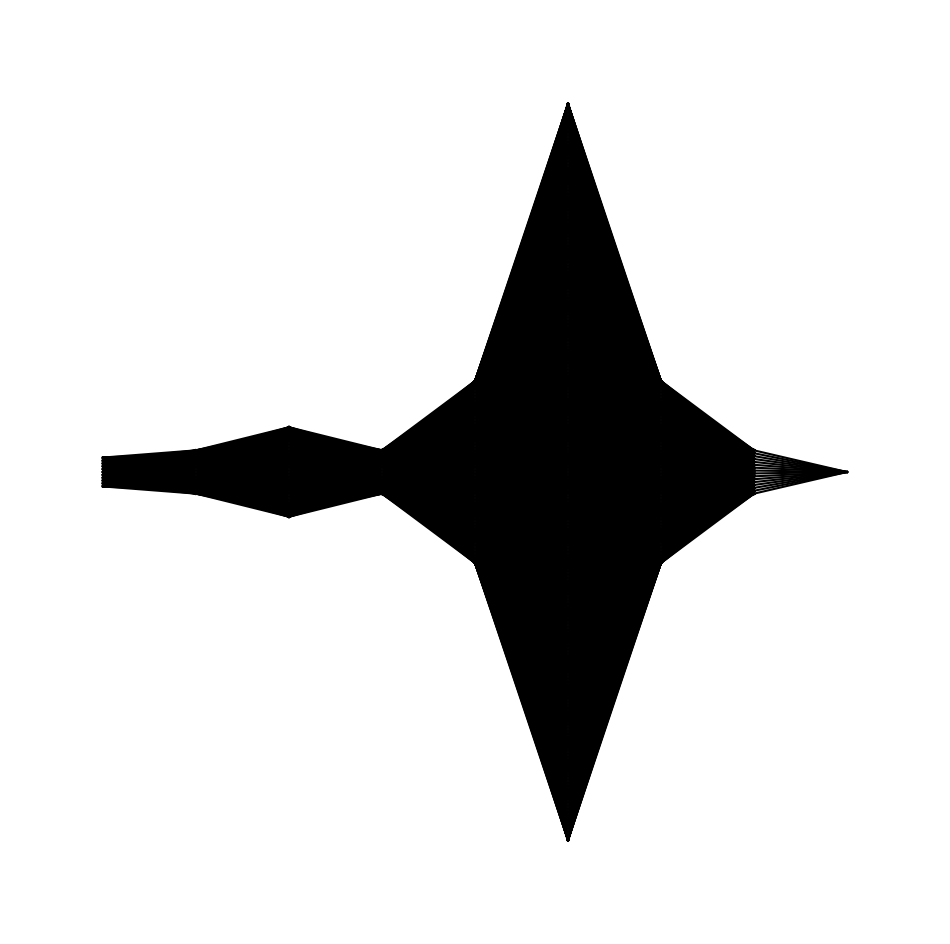

In [ ]:
# Drawing the architecture

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of your model
layer_sizes = [11, 16, 32, 16, 64, 256, 64, 16, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()

In [ ]:
model_1.evaluate(X_test, y_test, verbose = 1)
model_1_test_pred = np.round(model_1.predict(X_test))

63/63 [==============================] - 0s 374us/step


Results for model_1 TEST
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



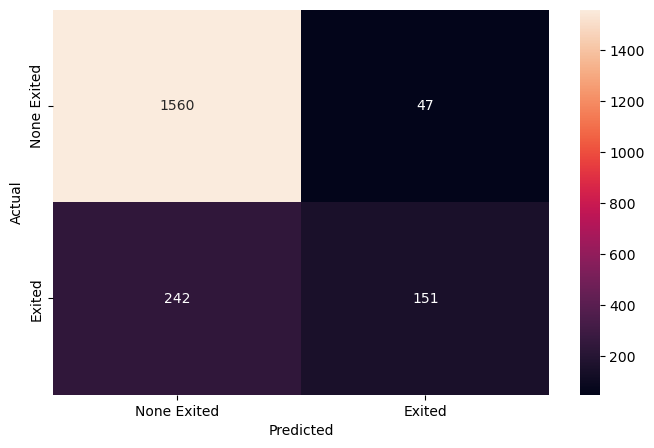

In [ ]:
print('======================================================================================================================')
print('Results for model_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_1_test_pred))
cm = confusion_matrix(y_test, model_1_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['None Exited', 'Exited'], yticklabels=['None Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Second_Model**
In my work with model_1, I designed a neural network architecture consisting of seven hidden layers. The first layer has 16 neurons, the second 32, the third 16, the fourth 64, the fifth 256, the sixth 64, and finally the seventh 16. All layers utilize the ReLU (Rectified Linear Unit) activation function to enhance the model's performance.

I used a learning rate of 0.001 during my training process, which consisted of 100 epochs. I applied a 10% validation split to monitor performance and set the batch size to 32. The model achieved an accuracy of 85% on the test dataset, with a loss of 0.3424. There were 36497 parameters estimated, and the entire training took 5.53 seconds.

# THIRD MODEL  (model_2)

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

With the modify_2 model, I will develop an architecture of four hidden layers: the first with 16, the second with 32, the third and fourth with 64, and the fifth with 256 and ReLU activation functions.

In [ ]:
#Adding the layers sequentially
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_shape=(11,)))
Dropout(0.5),
model_2.add(Dense(32, activation='relu'))
Dropout(0.5),
model_2.add(Dense(64, activation='relu'))
Dropout(0.5),
model_2.add(Dense(256, activation='relu'))
Dropout(0.5),
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 256)               16640     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 19745 (77.13 KB)
Trainable params: 19745 (77.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of parameters to estimate is 19745—total training time: 5.35 seconds.

Epoch 1/100
225/225 - 1s - loss: 0.4860 - accuracy: 0.7939 - val_loss: 0.4313 - val_accuracy: 0.8037 - 880ms/epoch - 4ms/step
Epoch 2/100
225/225 - 0s - loss: 0.4508 - accuracy: 0.8046 - val_loss: 0.4080 - val_accuracy: 0.8225 - 153ms/epoch - 682us/step
Epoch 3/100
225/225 - 0s - loss: 0.4300 - accuracy: 0.8175 - val_loss: 0.3959 - val_accuracy: 0.8413 - 148ms/epoch - 656us/step
Epoch 4/100
225/225 - 0s - loss: 0.4046 - accuracy: 0.8268 - val_loss: 0.3678 - val_accuracy: 0.8525 - 157ms/epoch - 699us/step
Epoch 5/100
225/225 - 0s - loss: 0.3746 - accuracy: 0.8450 - val_loss: 0.3580 - val_accuracy: 0.8438 - 151ms/epoch - 671us/step
Epoch 6/100
225/225 - 0s - loss: 0.3621 - accuracy: 0.8467 - val_loss: 0.3564 - val_accuracy: 0.8462 - 140ms/epoch - 624us/step
Epoch 7/100
225/225 - 0s - loss: 0.3558 - accuracy: 0.8517 - val_loss: 0.3477 - val_accuracy: 0.8550 - 146ms/epoch - 649us/step
Epoch 8/100
225/225 - 0s - loss: 0.3512 - accuracy: 0.8533 - val_loss: 0.3435 - val_accuracy: 0.8537 - 169

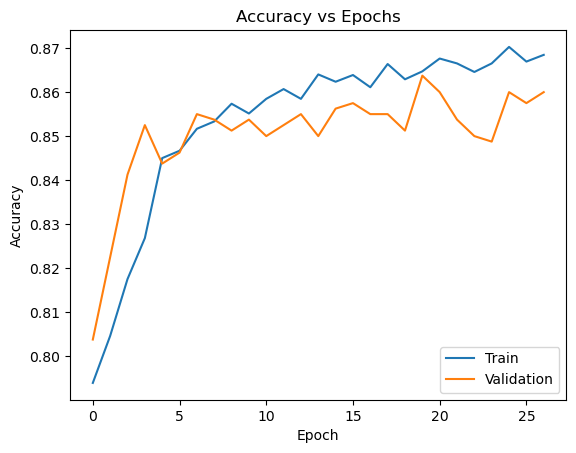

In [ ]:
# Before training, I will deploy some lines of code to measure the training time required by this architecture.

import time
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

start_time = time.time()

history_2 = model_2.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

A graphical representation of this neural network (Model_2)

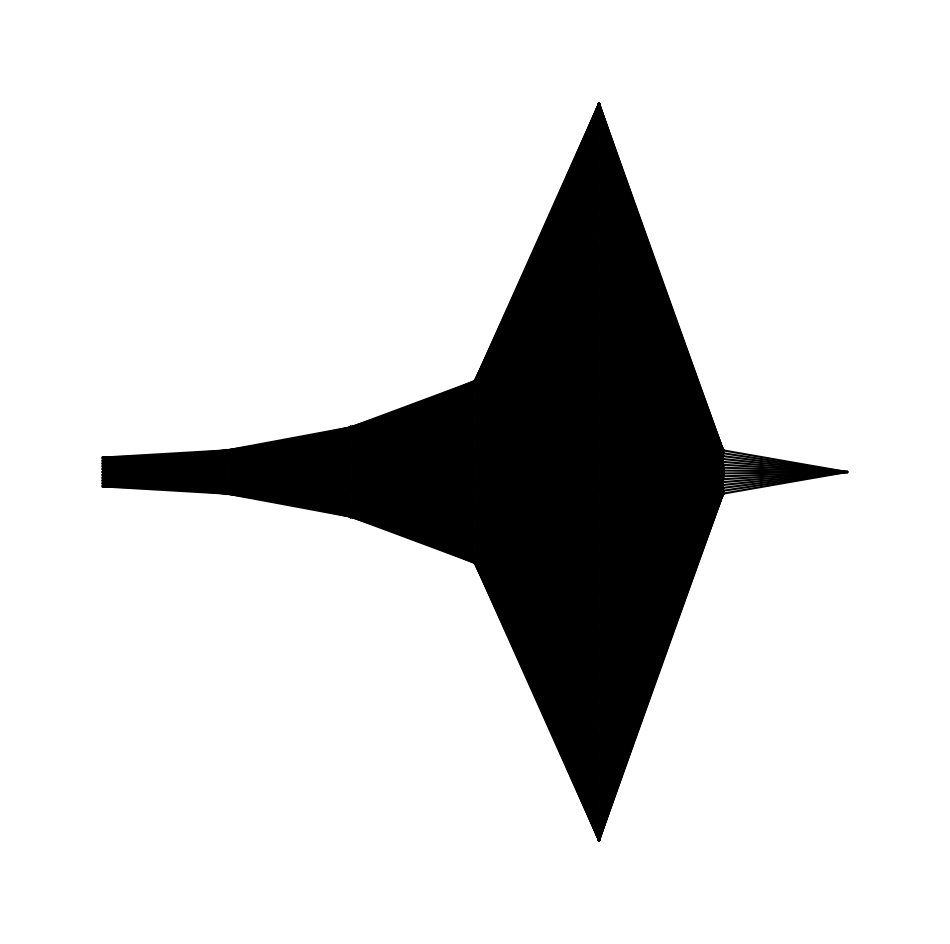

In [ ]:
# Drawing the architecture

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of your model
layer_sizes = [11, 16, 32, 64, 256, 16, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()

In [ ]:
model_2.evaluate(X_test, y_test, verbose = 1)
model_2_test_pred = np.round(model_2.predict(X_test))

63/63 [==============================] - 0s 323us/step


Results for model_2 TEST
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.73      0.41      0.52       393

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



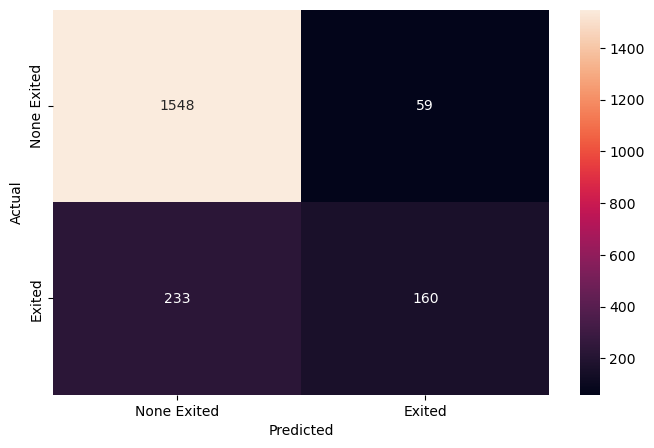

In [ ]:
print('======================================================================================================================')
print('Results for model_2 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_2_test_pred))
cm = confusion_matrix(y_test, model_2_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['None Exited', 'Exited'], yticklabels=['None Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Third_Model**
Using model_2, I crafted an innovative architecture featuring four hidden layers: the first with 16 neurons, the second with 32, and both the third and fourth layers with 64. This culminates in a robust fifth layer with 256 neurons, all powered by ReLU activation functions. This carefully designed structure optimizes performance and enhances learning capabilities.

Throughout my training journey, which spanned 100 epochs, I maintained a learning rate of 0.001 to ensure steady progress. By implementing a 10% validation split, I effectively tracked performance, while utilizing a batch size of 32 for optimal efficiency. The model impressed with an accuracy rate of 85% on the test dataset, achieving a loss of just 0.3499. A total of 19745 parameters were estimated, and remarkably, the entire training process took only 5.35 seconds.

### Proposal for actionable insights and recommendations
**Key business insights:**

* Based on the performance of these ***three models***, here are some business insights that can be drawn:

1. Performance Stability with Varying Architectures

Despite differences in complexity, all three models achieve similar accuracy (around 85-86%), with the first, simpler model performing slightly better.

* This suggests that additional layers or neurons do not significantly improve performance for this dataset.
* Therefore, the simpler model ***Model 1*** is preferable due to its training efficiency and lower computational cost.
***Business Insight:*** Simpler models may be sufficient for similar predictive tasks in the future, saving resources without compromising performance.
_____________________________
2. ***Model 2***, with the most complex architecture (seven layers and 36,497 parameters), shows no meaningful improvement in accuracy and, given the high number of parameters, is at a higher risk of overfitting.
***Insight:*** Investing in highly complex architectures might not yield better predictive power and could increase maintenance and computational costs. Balancing model complexity with interpretability and cost-efficiency is crucial for predicting customer churn.
___________________________
3. ***Model 1*** completes training in 6.56 seconds with only 769 parameters, while the more complex models take a similar time but require significantly more parameters.
***Business Insight:*** A more efficient, simpler model like ***Model 1*** could allow quicker retraining and adaptability as new data becomes available. Quickly iterating and deploying models in fast-paced environments may offer a competitive advantage for real-time decision-making.

**Summary and Conclusion**
____________________________
For the business problem of predicting customer churn (customer will leave within the next 6 months), ***Model 1*** (with two hidden layers and 769 parameters) is the best option due to its efficiency, accuracy, and lower maintenance cost. This model can be easily retrained as new data arrives, making it a practical choice for integrating into a more extensive decision-support system that needs regular updates.




# **THANK YOU**